In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
image_format = 'jpeg'

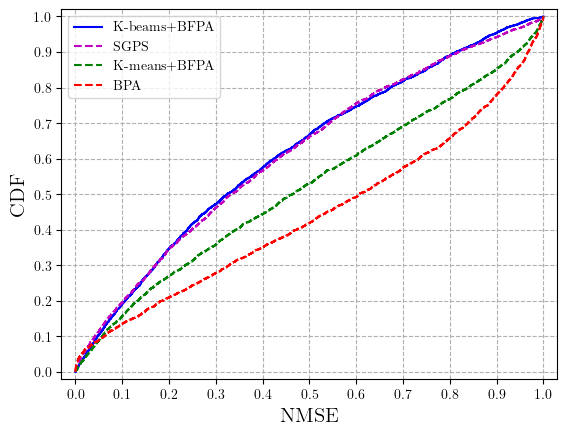

In [45]:
variables = np.load('./VARIABLES_SAVED/NMSEs_CDF_Iter_30.npz')
Kmeans = variables['results_array'][0]
DCC = variables['results_array'][1]
Kbeams = variables['results_array'][2]
SGPS = variables['results_array'][3]

fig, ax = plt.subplots()
plt.grid(visible = True, linestyle='--')

plt.ecdf(Kbeams, label="K-beams+BFPA", color='b')
plt.ecdf(SGPS, label="SGPS", color='m', linestyle='--')
plt.ecdf(Kmeans, label="K-means+BFPA", color='g', linestyle='--')
plt.ecdf(DCC, label="BPA", color='r', linestyle='--')
plt.yticks(np.arange(0, 1.10, step=0.1))
plt.xticks(np.arange(0, 1.10, step=0.1))

plt.xlabel(r'NMSE', size=15)
plt.ylabel(r'CDF', size=15)

plt.ylim(-0.02,1.02)
plt.xlim(-0.03,1.03)
plt.legend(fontsize=10)


plt.draw()
plt.show()

image_format = 'pdf' # e.g .png, .svg, etc.
image_name = 'NMSEs_CDF.pdf'
fig.savefig(image_name, format=image_format, dpi=400)





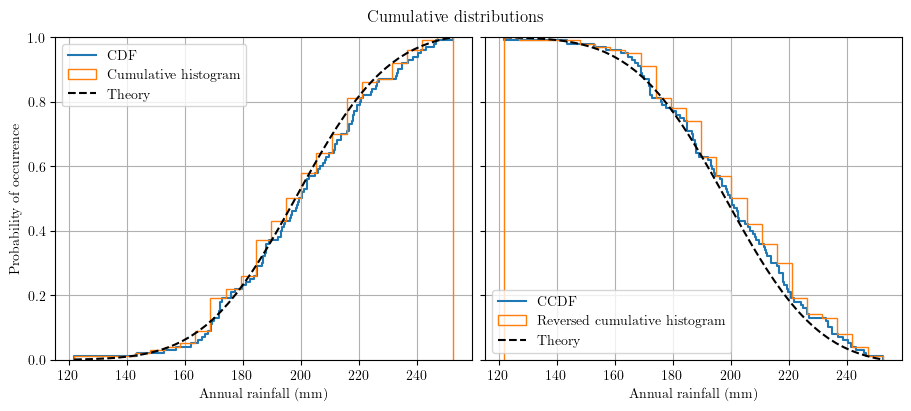

In [2]:




np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 25
data = np.random.normal(mu, sigma, size=100)

fig = plt.figure(figsize=(9, 4), layout="constrained")
axs = fig.subplots(1, 2, sharex=True, sharey=True)

# Cumulative distributions.
axs[0].ecdf(data, label="CDF")
n, bins, patches = axs[0].hist(data, n_bins, density=True, histtype="step",
                               cumulative=True, label="Cumulative histogram")
x = np.linspace(data.min(), data.max())
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (x - mu))**2))
y = y.cumsum()
y /= y[-1]
axs[0].plot(x, y, "k--", linewidth=1.5, label="Theory")

# Complementary cumulative distributions.
axs[1].ecdf(data, complementary=True, label="CCDF")
axs[1].hist(data, bins=bins, density=True, histtype="step", cumulative=-1,
            label="Reversed cumulative histogram")
axs[1].plot(x, 1 - y, "k--", linewidth=1.5, label="Theory")

# Label the figure.
fig.suptitle("Cumulative distributions")
for ax in axs:
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("Annual rainfall (mm)")
    ax.set_ylabel("Probability of occurrence")
    ax.label_outer()

plt.show()